Question 1:
A piece of paper is 1mm thick. Assuming you can fold it as many
times as you want, how many folds would it take to exceed the
height of Mount Everest at 8,848 m?

In [1]:
# define key variables for the question
paperThickness = 1
everestHeight = 8848
numberOfFolds = 0
#convert 1mm to 1m
paperThicknessInMeters = paperThickness/1000

# Because we don't want to surpass the height of everest, we add a check for it 
while((paperThicknessInMeters*2)<everestHeight):
    # since the thickness of the paper doubles exponentially, 
    # we multiply the thickness by 2
    paperThicknessInMeters*=2
    # increase the number of folds by 1 before repeating the loop
    numberOfFolds+=1    
    
# the number of folds it would take to exceed the height of mount everest would be
# the current number of folds plus one, since the current number does not exceed 
# the height of mt. everest
print("Total number of folds required to exceed mount everest: ", numberOfFolds+1)


Total number of folds required to exceed mount everest:  24


Question 2:
The volume of water in a reservoir decreases at an exponential
rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t,
does it take for the volume to decrease to less than one half of its
initial volume, v(0)?

In [47]:
# to use the exp function
import math

# basing on the equation v(t) = v(0)exp(-at) 

# defining key variables
initial_volume = 22_777
time_spent=0
current_d_vol = initial_volume
# a is assumed to be 0.1
decay_constant = 0.1

# finding the time at which v(0)/2
half_init_volume = initial_volume/2

# so in order to find time t, we can re-arrange the equation to 
# t = ln(v0 / v(t)) /a
# we can use the math module to help with the natural logarithm
time_spent = math.log(initial_volume/half_init_volume) /decay_constant


print("It will take approximately " + str(round(time_spent,2)) + " units of time.")

It will take approximately 6.93 units of time.


Question 3:
If you deposit $100 in a bank account that offers an annualized
interest rate of 5% (compounded annually), how much money will
you have (round to the $) after one, two, three, four and five years?

In [84]:
# to utilize the trunc function
import math

# initialize key variables
deposit = 100
annualized_interest_rate = 0.05
months_in_year = 12
max_interest_years =5
current_year=1

# we use a loop to generate compound interest for five years
while(current_year<=max_interest_years): 
    # here we apply the compound interest formula a=p(1+r/n)pow(nt)
    annualized_interest_after_year=deposit*(1+(annualized_interest_rate/months_in_year))**(months_in_year*current_year)
    # print the compound interest while truncating it
    print("Accumulated compound interest after year "+ str(current_year) + ": " +str(math.trunc(annualized_interest_after_year)))
    # increase the year counter by 1
    current_year+=1


Accumulated compound interest after year 1: 105
Accumulated compound interest after year 2: 110
Accumulated compound interest after year 3: 116
Accumulated compound interest after year 4: 122
Accumulated compound interest after year 5: 128


Question 4:
Suppose you want to buy a car worth $20,000. A financial
institution can provide a loan with a monthly interest rate of 1%.
What is the monthly payment to pay off the debt in one, two and
three years (rounded to the nearest $)?

In [86]:
# to utilize the trunc method
import math

# supposing you want
car_value = 20_000
monthly_interest = 0.01
loan_term = 1
max_loan_term = 3
monthly_payment = 0

# loop that will run for the max loan term period
while(loan_term<=max_loan_term):
    # get the total number of payments for the current loan term 
    total_number_of_payments = 12*loan_term
    
    # apply the loan payment formula p=r(pv)/1-(1+R)pow(-n)
    monthly_payment =(car_value*monthly_interest)/(1-(1+monthly_interest)**-total_number_of_payments)
    
    # display the monthly loan contribution for the loan term
    print("Monthly loan contribution for "+ str(loan_term) +" year loan term: "+str(math.trunc(monthly_payment)))
    
    # increase the loan term period by 1
    loan_term+=1    


Monthly loan contribution for 1 year loan term: 1776
Monthly loan contribution for 2 year loan term: 941
Monthly loan contribution for 3 year loan term: 664


Question 5:
You are about to set up a new business and will invest $100,000.
On day one you expect to have 100 customers and the number of
customers will grow at a rate of 1% per day. If each customer
provides profits of $10, how many days will it take to repay your
initial investment based on cumulated profits? Plot cumulated
profits per day, show initial investment and mark breakeven day.

Text(0.5, 1.0, 'Graph show profits from investment and breakeven day')

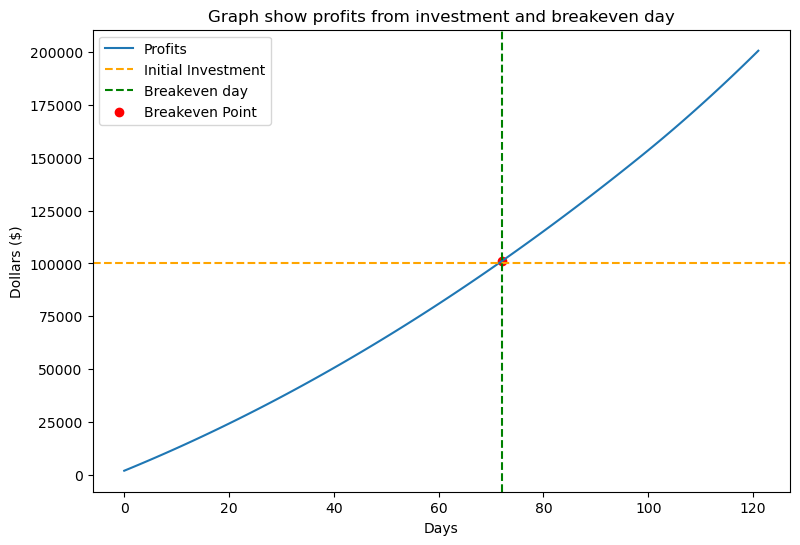

In [2]:
# to use the trunc method
import math
# to use the dataframe method
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt

# defining key variables 
initial_customers = 100
initial_investment = 100_000
growth_rate = 0.01
daily_customer_profits = 10
customers = initial_customers
profits = 0

# we find the first day profits
profits = daily_customer_profits*customers
# we mark that one day has past
days_past=1
# initialize a dictionary to store days and profit points
# this structure is okay since we are not planning on modifying often 
days_vs_profits = {"Days":[],"Profits":[]}

# we make sure to store data the crosses the initial investment but some margin
while(profits < 200_000):
    # find the increase of customers by the growth rate 
    customers = math.trunc(customers + (customers*growth_rate))
    # calculate the profits made with new number of customers
    profits += customers*daily_customer_profits
    # add the days and profits to our collection
    days_vs_profits["Days"].append(days_past)
    days_vs_profits["Profits"].append(profits)
    # increase the days past counter by 1
    days_past+=1
    
# create the data frame from our collection 
df = pd.DataFrame(data=days_vs_profits)

# create our condition to find the point when the initial investment is realized
mask = df['Profits'] > 100_000
# find the first occurence of our condition
threshold = df.loc[mask].head(1).index

# in the following lines we configure our graph using plt
plt.figure(figsize=(9,6))
plt.plot(df.index, df['Profits'], label="Profits")
plt.axhline(y=initial_investment, color='orange', linestyle='--', label="Initial Investment")
plt.axvline(x=threshold, color='green', linestyle='--', label="Breakeven day",)
plt.scatter(threshold, df.loc[threshold, 'Profits'], color='red', label="Breakeven Point", marker='o')
plt.xlabel("Days")
plt.ylabel("Dollars ($)")
plt.legend()
plt.title("Graph show profits from investment and breakeven day")


Question 6:
Using data from http://bit.ly/1JJyf29 and linear interpolation,
estimate the dates when the number of cases and deaths due to
Ebola exceeded 100, 500, 1000, 2000 and 5000. Graph the cases
and deaths (observations and interpolations) and mark the dates
when thresholds were exceeded with a circle.

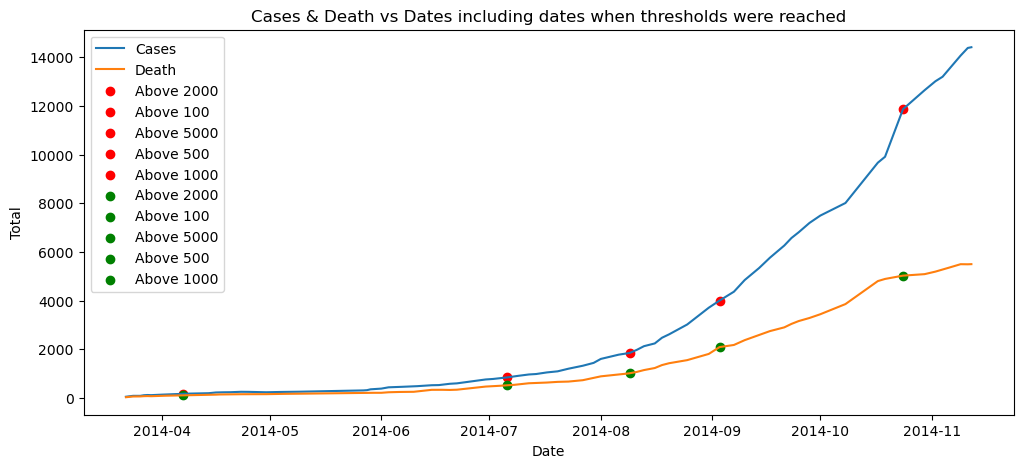

In [4]:
# to use the read_excel function
import pandas as pd
# to use graph plotting function
import matplotlib.pyplot as plt

# reading from the data file
df = pd.read_excel("data/ebola_download.xls", usecols="B,C,A")

# defining key variables
df["Date"]=pd.to_datetime(df["Date"])
min_date = df["Date"].min()
max_date = df['Date'].max()
df.set_index('Date', inplace=True)

# using the min_date and max_date to form up a range
new_index = pd.date_range(start=min_date, end=max_date, freq='D')
# reindex the dataframe
resampled_df = df.reindex(new_index)

df_interpolated = resampled_df.interpolate(method='linear')

# we will later use these threshold values in a condition to get the 
# first occurrences from our dataset 
thresholds = {
    100,
    500,
    1000,
    2000,
    5000
}

# storing the first occurrences in a dictionary
cases_first_occurrences={}
deaths_first_occurrences={}

# loop through the cases series to find the first occurrence of our 
# threshold and store it in the collection
for threshold in thresholds:
    # set the condition using the current threshold
    mask = df['Cases'] > threshold
    # make sure we only look up the dataframe if we found matches 
    if mask.any():
        # get the first occurrence by index
        first_index = df.loc[mask].head(1).index[0]
        # store the first occurrence to our dictionary using the threshold as a key 
        cases_first_occurrences[threshold] = first_index

# loop through the cases series to find the first occurrence of our 
# threshold and store it in the collection
for threshold in thresholds:
    # make sure we only look up the dataframe if we found matches 
    mask = df['Death'] > threshold
    # make sure we only look up the dataframe if we found matches 
    if mask.any():
        # get the first occurrence by index
        first_index = df.loc[mask].head(1).index[0]
        # store the first occurrence to our dictionary using the threshold as a key 
        cases_first_occurrences[threshold] = first_index

# configure the line graph
plt.figure(figsize=(12,5))
plt.plot(df_interpolated.index, df_interpolated['Cases'], label="Cases")
plt.plot(df_interpolated.index, df_interpolated['Death'], label="Death")
# loop through our collection and plot the first occurrences against the other data points
for threshold in thresholds:
    plt.scatter(cases_first_occurrences[threshold], df.loc[cases_first_occurrences[threshold],'Cases'], color='red', label="Above " + str(threshold), marker="o")

# loop through our collection and plot the first occurrences against the other data points
for threshold in thresholds:
    plt.scatter(cases_first_occurrences[threshold], df.loc[cases_first_occurrences[threshold],'Death'], color='green', label="Above " + str(threshold), marker="o")

# define labels, title and enable and show the graph
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total")
plt.title("Cases & Death vs Dates including dates when thresholds were reached")
plt.show()

Question 7:
Using data from 2014, downloaded in the previous question, what
is the average growth rate per day, as a percentage, in the number
of Ebola cases and deaths?

In [44]:
# still using the data from the previous question 

# save the total number of days 
number_of_days = len(df_interpolated.index)
# number of days as years
nod_as_years = number_of_days/12

# since we are finding the percentage growth for two series
# it's better we have a reusable function to calculate the percentage growth
def get_perc_growth(first_value, final_value, years):
    # using the formula
    # we then apply the two variables to get the average daily growth
    average_annual_growth = (final_value/first_value)**(1/years)-1
    # convert the annual growth to daily growth
    average_daily_growth = (1+average_annual_growth)**(1/365)-1
    # return average growth as percentage
    return average_daily_growth*100

# getting the initial case value 
first_case = df_interpolated['Cases'].head(1).values[0]
# getting the final case value 
last_case = df_interpolated['Cases'].tail(1).values[0]
# get the percentage daily growth
perc_case_cgrowth = get_perc_growth(first_case, last_case, nod_as_years)
# display the result
print("Death Percentage Daily Growth: "+str(round(perc_case_cgrowth,2))+"%")


death_diff = df_interpolated['Death'].max() - df_interpolated['Death'].min()
# getting the initial death value
initial_death = df_interpolated['Death'].iloc[0]
# getting the final death value
last_death = df_interpolated['Death'].iloc[-1]
# get the percentage daily growth
perc_case_dgrowth = get_perc_growth(initial_death, last_death, nod_as_years)
# display the result
print("Case Percentage Daily Growth: "+str(round(perc_case_dgrowth,2))+"%")


Death Percentage Daily Growth: 0.08%
Case Percentage Daily Growth: 0.07%


Question 8:
Using the same date, plot the number of deaths versus the number
of cases and estimate the average ratio of Ebola deaths to cases.

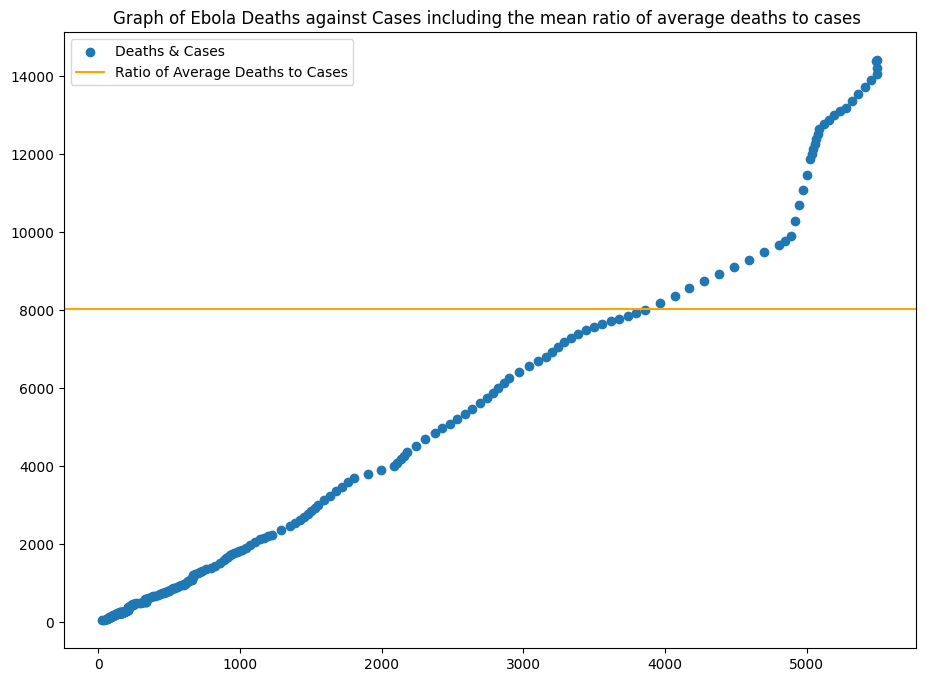

In [71]:
#to utilize plotting functions
import matplotlib.pyplot as plt

# still using the data frames from number 6

# we get the ratio of the deaths versus the number of cases as a series
df_interpolated['Ratio'] = df_interpolated['Death']/df_interpolated['Cases']

# use the ratio series and apply the mean function to find the average ratio
avg_ratio = df_interpolated['Ratio'].mean()

# configure a scatter graph using the results
plt.figure(figsize=(11,8))
plt.scatter(df_interpolated['Death'], df_interpolated['Cases'], label="Deaths & Cases")
plt.axhline(y=avg_ratio * df_interpolated['Cases'].max(), color='orange', linestyle='-', label="Ratio of Average Deaths to Cases")
# define the title, enable legend and show the graph
plt.title("Graph of Ebola Deaths against Cases including the mean ratio of average deaths to cases ")
plt.legend()
plt.show()


Question 9:
Obtain daily prices for two ETFs called SPY and TLT which track
the S&P500 index and long-term Treasury Bond. Select the
adjusted closing prices. Plot the two time series during 12/31/2013
– 08/31/2015 and make them comparable by starting from prices
of $100 on the first day in 12/31/2013 – 08/31/2015.

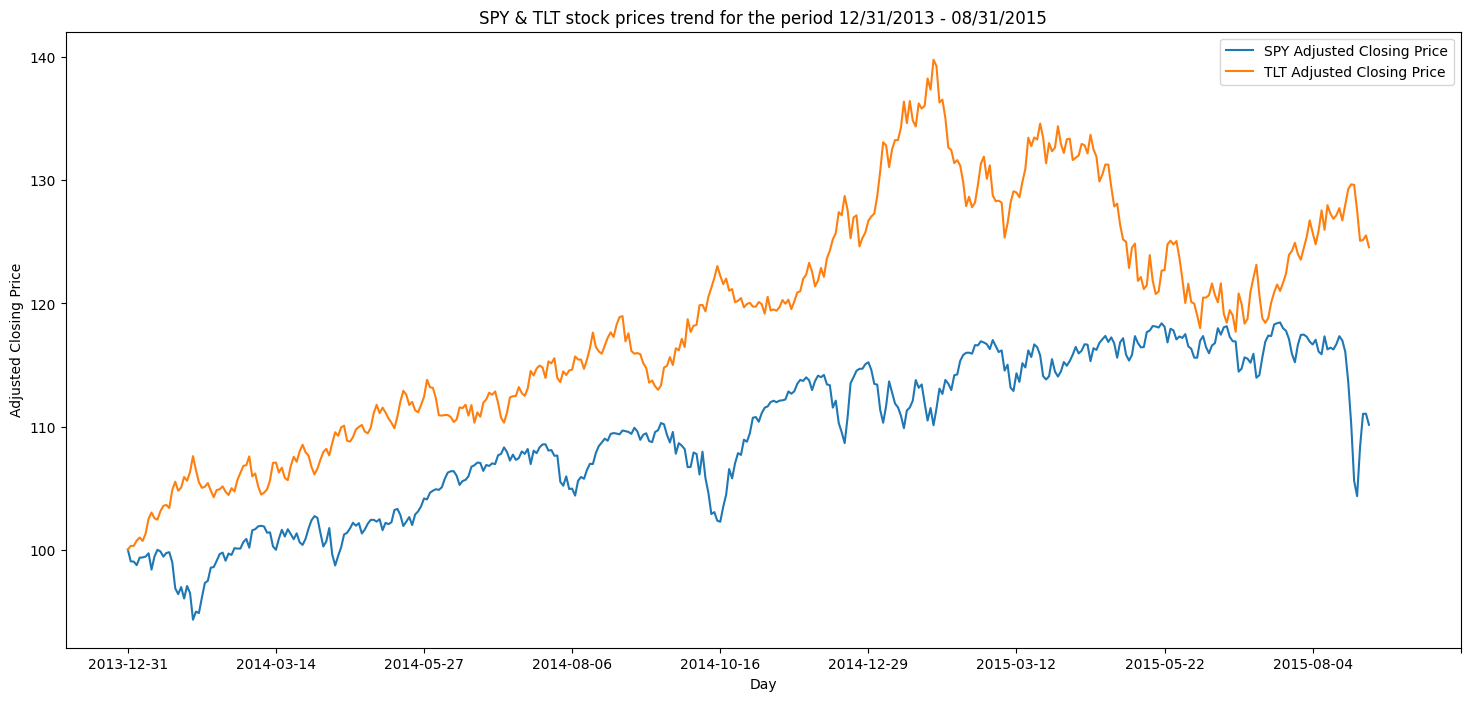

In [33]:
# to use the read_csv method
import pandas as pd
# to utilize plotting functions
import matplotlib.pyplot as plt
# to utilize the np arrange function
import numpy as np

# read the ETFs from csv files into individual dataframes
spy_df = pd.read_csv("data/SPY.csv", usecols=['Date','Adj Close'])
tlt_df = pd.read_csv("data/TLT.csv", usecols=['Date','Adj Close'])

# get the first record of the ADJ Close series for the SPY etf
spy_init_value = spy_df['Adj Close'].iloc[0]
# we normalize the SPY values such that they start from $100
spy_df['Adj Close'] = spy_df['Adj Close'].apply(lambda x: x * (100/spy_init_value))

# get the first record of the ADJ Close series for the TLT etf
tlt_init_value = tlt_df['Adj Close'].iloc[0]
# we normalize the Adj values such that they start from $100
tlt_df['Adj Close'] = tlt_df['Adj Close'].apply(lambda x: x * (100/tlt_init_value))

# consolidate necessary data into one data frame
etf_df = pd.DataFrame({
    'Date': spy_df['Date'],
    'Spy Adj Close': spy_df['Adj Close'],
    'Tlt Adj Close': tlt_df['Adj Close']
})


# configure the line graph
plt.figure(figsize=(18,8))
plt.plot(etf_df['Date'], etf_df['Spy Adj Close'], label="SPY Adjusted Closing Price")
plt.plot(etf_df['Date'], etf_df['Tlt Adj Close'], label="TLT Adjusted Closing Price")
plt.xticks(np.arange(0, 500, 50))
# define the labels and title, enable legend and show line graph
plt.xlabel('Day')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.title("SPY & TLT stock prices trend for the period 12/31/2013 - 08/31/2015")
plt.show()



Question 10:
For the ETFs on the previous question, calculate daily returns, r(t)
= p(t)/p(t-1)-1, for each trading day in the same time period as
above. Calculate the average, min and max daily return for each of
the two ETFs during the time period and express these as
percentages.

In [37]:
# using the dataframe from question 9

# using percentage change function to get the daily returns for the SPY ETF 
etf_df['SPY Return'] = etf_df['Spy Adj Close'].pct_change()*100
# get the mean from the percentage change series of values
mean = etf_df['SPY Return'].mean()
# display the result
print("SPY Average Percentage: " + str(round(mean,2))+"%")

# get the minimum value in the SPY ETF 
min = etf_df['SPY Return'].min()
# express the minimum value as a percentage
print("SPY Min Daily Return Percentage: " + str(round(min,2))+"%")
# get the maximum value in the SPY ETF 
max = etf_df['SPY Return'].max()
print("SPY Max Daily Return Percentage: " + str(round(max,2))+"%")

# using percentage change function to get the daily returns for the TLT ETF 
etf_df['TLT Return'] = etf_df['Tlt Adj Close'].pct_change()*100

# get the mean from the percentage change series of values
mean = etf_df['TLT Return'].mean()
# display the result
print("TLT Average Percentage: " + str(round(mean,2))+"%")

# get the minimum value in the TLT ETF 
min = etf_df['TLT Return'].min()
# display the result
print("TLT Min Daily Return Percentage: " + str(round(min,2))+"%")

# get the maximum value in the TLT ETF 
max = etf_df['TLT Return'].max()
# display the result
print("TLT Max Daily Return Percentage: " + str(round(max,2))+"%")

SPY Average Percentage: 0.03%
SPY Min Daily Return Percentage: -4.21%
SPY Max Daily Return Percentage: 3.84%
TLT Average Percentage: 0.06%
TLT Min Daily Return Percentage: -2.43%
TLT Max Daily Return Percentage: 2.65%
